In [24]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from market import IntegratedMarketModel

In [25]:
n_firms = 10 
n_consumers = 500
n_chars = 2
T = 1
s = 100

In [26]:
model = IntegratedMarketModel(
        n_firms, 
        n_consumers, 
        n_chars, 
        T, 
        seed=s
    )
model.demand_side_optimisation()


In [27]:
vp1 = model.v_p[:,0]
print(vp1.shape)
price1 = model.prices[:,0]

e=0 


market_shares, all_probs, mean_indirect_utility = model.compute_share(vp1, price1, e)
J_true = model.construct_Jacobian(all_probs, vp1)
print(J_true)
print(all_probs)

(500,)
[[ 6.21208647e-03 -3.43721480e-05 -3.84291139e-05 -2.94082086e-05
  -3.10905029e-05 -4.70664349e-05 -3.53909071e-05 -4.06598615e-05
  -3.54133190e-05 -4.08450077e-05]
 [-3.43721480e-05  5.94538513e-03 -3.64408436e-05 -2.78864421e-05
  -2.94819122e-05 -4.46318222e-05 -3.35598753e-05 -3.85558348e-05
  -3.35807808e-05 -3.87321487e-05]
 [-3.84291139e-05 -3.64408436e-05  5.32839098e-03 -3.11816800e-05
  -3.29594184e-05 -4.98818215e-05 -3.75168754e-05 -4.31127423e-05
  -3.75502456e-05 -4.32897984e-05]
 [-2.94082086e-05 -2.78864421e-05 -3.11816800e-05  7.07150628e-03
  -2.52267492e-05 -3.82081115e-05 -2.87179226e-05 -3.29826849e-05
  -2.87283852e-05 -3.31554543e-05]
 [-3.10905029e-05 -2.94819122e-05 -3.29594184e-05 -2.52267492e-05
   4.42004135e-03 -4.03576130e-05 -3.03528091e-05 -3.48791887e-05
  -3.03789275e-05 -3.50241094e-05]
 [-4.70664349e-05 -4.46318222e-05 -4.98818215e-05 -3.82081115e-05
  -4.03576130e-05  1.87554357e-03 -4.59316767e-05 -5.28331046e-05
  -4.60234968e-05 -5.29620

In [28]:
vp2 = np.random.normal(0, 1, n_consumers)
J_approx = model.construct_Jacobian(all_probs, vp2)
print(J_approx)


J_true_flat = J_true.flatten()
J_approx_flat = J_approx.flatten()


# Compare the matrices element-wise with a tolerance of 0.2
comparison = np.allclose(J_true, J_approx, atol=1e-04)

# Print the result
if comparison:
    print("The matrices are approximately the same.")
else:
    print("The matrices are different.")


[[-4.90009086e-02  2.85961721e-05  3.25763274e-05  2.34828817e-05
   2.63089845e-05  4.18756364e-05  3.01999145e-05  3.20383738e-05
   2.69970340e-05  3.61412878e-05]
 [ 2.85961721e-05 -4.63567900e-02  3.08629102e-05  2.22501816e-05
   2.49252881e-05  3.96698255e-05  2.86111580e-05  3.03573382e-05
   2.55821833e-05  3.42378482e-05]
 [ 3.25763274e-05  3.08629102e-05 -5.45126747e-02  2.53053241e-05
   2.84118586e-05  4.53014365e-05  3.26235100e-05  3.45069366e-05
   2.90386461e-05  3.90907235e-05]
 [ 2.34828817e-05  2.22501816e-05  2.53053241e-05 -3.53565936e-02
   2.04399814e-05  3.23963130e-05  2.34458897e-05  2.50533800e-05
   2.11790758e-05  2.79726999e-05]
 [ 2.63089845e-05  2.49252881e-05  2.84118586e-05  2.04399814e-05
  -4.39010603e-02  3.65776336e-05  2.63448267e-05  2.78738487e-05
   2.34597379e-05  3.15635023e-05]
 [ 4.18756364e-05  3.96698255e-05  4.53014365e-05  3.23963130e-05
   3.65776336e-05 -7.56766998e-02  4.20322439e-05  4.41168599e-05
   3.69974203e-05  5.05287709e-05

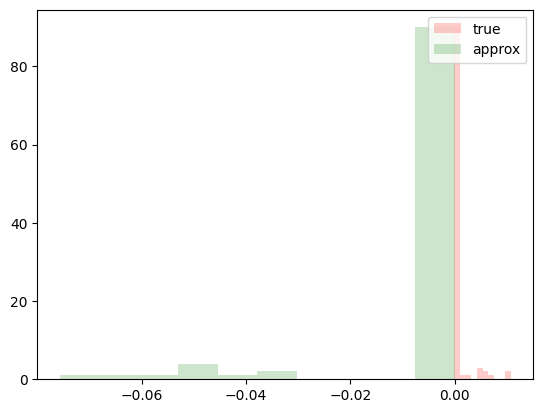

In [29]:
plt.hist(J_true_flat, 
         bins=10,
         alpha=0.2, 
         label='true',
         color='red') # customized color parameter
  
plt.hist(J_approx_flat,
         bins=10, 
         alpha=0.2,
         label='approx',
         color='green')

plt.legend(loc='upper right')
plt.show()

In [30]:
wage = 10 
theta_0 = 1
theta_L = 0.3 
theta_K = 0.7
q= np.ones(2)

productivity_shocks = np.ones((2,2))
capital = np.ones((2,2))

t = 0

MC = (wage*(1/theta_L))*((q)/(np.exp(theta_0 + productivity_shocks[:,t])*
              capital[:,t]**theta_K))**((1/theta_L)-1) *(1/(np.exp(theta_0 + productivity_shocks[:,t])*
              capital[:,t]**theta_K))

print(MC)

[0.04242113 0.04242113]


In [31]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print(x.shape)

(2, 3)


In [78]:
n_cons = 3
n_firms = 2
product_chars = np.array(([1, 3, 3], [1, 2, 2]))
mu = 1
omega = 0.5
v_p = np.array([4, 5, 6])
price = np.ones(n_firms)
beta = np.array([1, 0.5, 0.5])

mean_indirect_utility = product_chars@beta - mu*price

mean_indirect_utility_for_utility = np.repeat(mean_indirect_utility, n_cons, axis=0)

price_r = np.reshape(price, (1, n_firms))
alpha_i = np.reshape((omega*v_p), (n_cons, 1))



random_coeff = np.ravel((alpha_i@price_r).T)



u = mean_indirect_utility_for_utility  + random_coeff + e
print(u)

u_r = np.reshape(u, (n_firms, n_cons))
print(u_r)
sum_u = np.sum(np.exp(u_r), axis=0)
print(sum_u)

all_probs = np.exp(u_r)/(1 + sum_u)
print(all_probs)
market_shares = (np.sum(all_probs, axis=1))/n_cons
# # market_shares = np.sum(all_probs, axis=1)/self.n_consumers
p1 = all_probs[0, :]
print(p1)



[5.  5.5 6.  4.  4.5 5. ]
[[5.  5.5 6. ]
 [4.  4.5 5. ]]
[203.01130914 334.70906356 551.8419526 ]
[[0.72747516 0.72888092 0.72973621]
 [0.26762315 0.26814031 0.26845495]]
[0.72747516 0.72888092 0.72973621]


In [ ]:
J = np.zeros((n_firms, n_firms))
alphas = -mu + omega*v_p






for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        p1 = all_probs[i, :]
        print(p1)
        if i == j:
            J[i, j] = np.sum((alphas * p1 - alphas * (p1 ** 2))/(n_cons)



        else: 
            p2 = all_probs[j, :]
            J[i, j] = np.sum((-alphas * p1 * p2), axis=1)/(n_cons)


        return J